In [1]:
import numpy as np
import multiprocessing as mp
from tqdm import tqdm

proc_num = 10
print(f"Number of processors: {proc_num}/{mp.cpu_count()}")
stat_cycle_num = 10

Number of processors: 10/12


In [2]:
import sympy as sp
from .RabinovichFabrikant import *

sp.init_printing()

system.equations

C:\Users\а\IdeaProjects\QBee\PythonPackage\quadratic_linearization.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
def get_steps(func):
    total_steps = list()
    for _ in tqdm(range(stat_cycle_num), desc="Cycle num", unit="run"):
        with mp.Pool(proc_num) as pool:
            steps_cur = pool.map(func, range(proc_num))
            total_steps += steps_cur
    return total_steps

def get_steps_alt(func):
    with mp.Pool(mp.cpu_count()) as pool:
        total_steps = list(tqdm(pool.imap_unordered(func, range(proc_num * stat_cycle_num)),
                                total=proc_num * stat_cycle_num))
        return total_steps

def print_statistics(steps):
    print(f"Range: [{np.nanmin(steps)}, {np.nanmax(steps)}]")
    print("Mean: ", np.nanmean(steps))
    print("Median: ", np.nanmedian(steps))
    print("Standard deviation: ", np.nanstd(steps))

### BFS

In [4]:
bfs_steps = get_steps(quad_bfs_stat)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 10/10 [09:29<00:00, 56.95s/run]


In [5]:
print("BFS steps statistics:")
print_statistics(bfs_steps)

BFS steps statistics:
Range: [45.0, 357.0]
Mean:  161.40425531914894
Median:  155.0
Standard deviation:  92.3708205686761


### ID-DFS with "Random" heuristics

In [6]:
iddfs_random = get_steps(quad_iddfs_random)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 10/10 [07:13<00:00, 43.36s/run]


In [7]:
print("Random ID-DFS steps statistics:")
print_statistics(iddfs_random)

Random ID-DFS steps statistics:
Range: [4.0, 342.0]
Mean:  150.22641509433961
Median:  113.0
Standard deviation:  101.78679929042843


### ID-DFS with "Frequent-first (FF)" heuristics

In [8]:
iddfs_frequent_first = get_steps(quad_iddfs_frequent_first)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 10/10 [07:03<00:00, 42.36s/run]


In [9]:
print("Frequent-first ID-DFS from 2 depth - steps statistics:")
print_statistics(iddfs_frequent_first)

Frequent-first ID-DFS from 2 depth - steps statistics:
Range: [18.0, 346.0]
Mean:  142.05454545454546
Median:  139.0
Standard deviation:  88.29360487123076


### ID-DFS with "Free-variables-count (FVC)" heuristics

In [10]:
iddfs_free_variables_count = get_steps(quad_iddfs_free_variables_count)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 10/10 [01:35<00:00,  9.53s/run]


In [11]:
print("Free-variables-count ID-DFS steps statistics:")
print_statistics(iddfs_free_variables_count)

Free-variables-count ID-DFS steps statistics:
Range: [4, 72]
Mean:  39.03
Median:  36.5
Standard deviation:  21.87027891911761


### ID-DFS with "Auxiliary-equation-degree (AED)" heuristics

In [12]:
iddfs_auxiliary_equation_degree = get_steps(quad_iddfs_auxiliary_equation_degree)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 10/10 [07:16<00:00, 43.60s/run]


In [13]:
print("Auxiliary-equation-degree ID-DFS steps statistics:")
print_statistics(iddfs_auxiliary_equation_degree)

Auxiliary-equation-degree ID-DFS steps statistics:
Range: [4.0, 317.0]
Mean:  113.02127659574468
Median:  94.0
Standard deviation:  104.26286121221466


### ID-DFS with "Auxiliary-equation-quadratic-discrepancy (AEQD)" heuristics

In [14]:
iddfs_auxiliary_equation_quadratic_discrepancy = get_steps(quad_iddfs_auxiliary_equation_quadratic_discrepancy)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.21s/run]


In [15]:
print("Auxiliary-equation-quadratic-discrepancy ID-DFS steps statistics:")
print_statistics(iddfs_auxiliary_equation_quadratic_discrepancy)

Auxiliary-equation-ql-discrepancy ID-DFS steps statistics:
Range: [4, 15]
Mean:  9.17
Median:  5.0
Standard deviation:  5.024052149410872


### ID-DFS with "Summary-monomial-degree (SMD)" heuristics

In [16]:
iddfs_summary_monomial_degree = get_steps(quad_iddfs_summary_monomial_degree)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 10/10 [08:37<00:00, 51.73s/run]


In [17]:
print("Summary-monomial-degree ID-DFS steps statistics:")
print_statistics(iddfs_summary_monomial_degree)

Summary-monomial-degree ID-DFS steps statistics:
Range: [4.0, 208.0]
Mean:  75.94545454545455
Median:  78.0
Standard deviation:  79.33757981088114


In [18]:
def filter_nan(lst):
    return list(filter(lambda s: not np.isnan(s), lst))

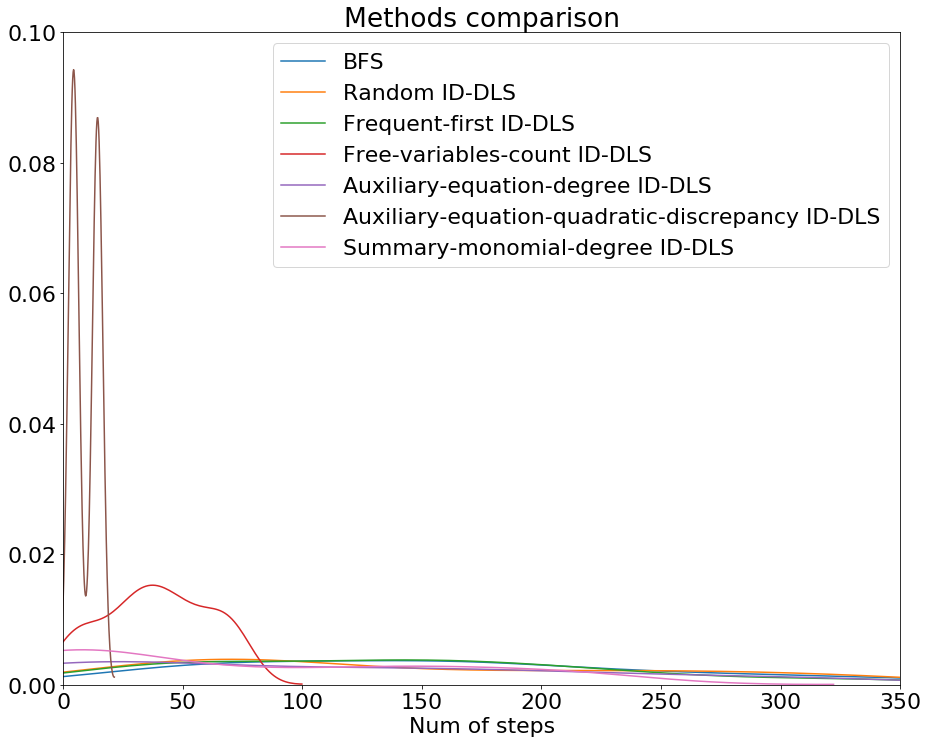

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))
sns.distplot(filter_nan(bfs_steps), label="BFS", kde=True, hist=False)
sns.distplot(filter_nan(iddfs_random), label="Random ID-DLS", kde=True, hist=False)
sns.distplot(filter_nan(iddfs_frequent_first), label="Frequent-first ID-DLS", kde=True, hist=False)
sns.distplot(filter_nan(iddfs_free_variables_count), label="Free-variables-count ID-DLS", kde=True, hist=False)
sns.distplot(filter_nan(iddfs_auxiliary_equation_degree), label="Auxiliary-equation-degree ID-DLS", kde=True, hist=False)
sns.distplot(filter_nan(iddfs_auxiliary_equation_quadratic_discrepancy), label="Auxiliary-equation-quadratic-discrepancy ID-DLS", kde=True, hist=False)
sns.distplot(filter_nan(iddfs_summary_monomial_degree), label="Summary-monomial-degree ID-DLS", kde=True, hist=False)
plt.legend()
plt.xlim(0, 350)
plt.ylim(0, 0.1)
plt.xlabel("Num of steps")
plt.title("Methods comparison")
plt.savefig('results/1.png')

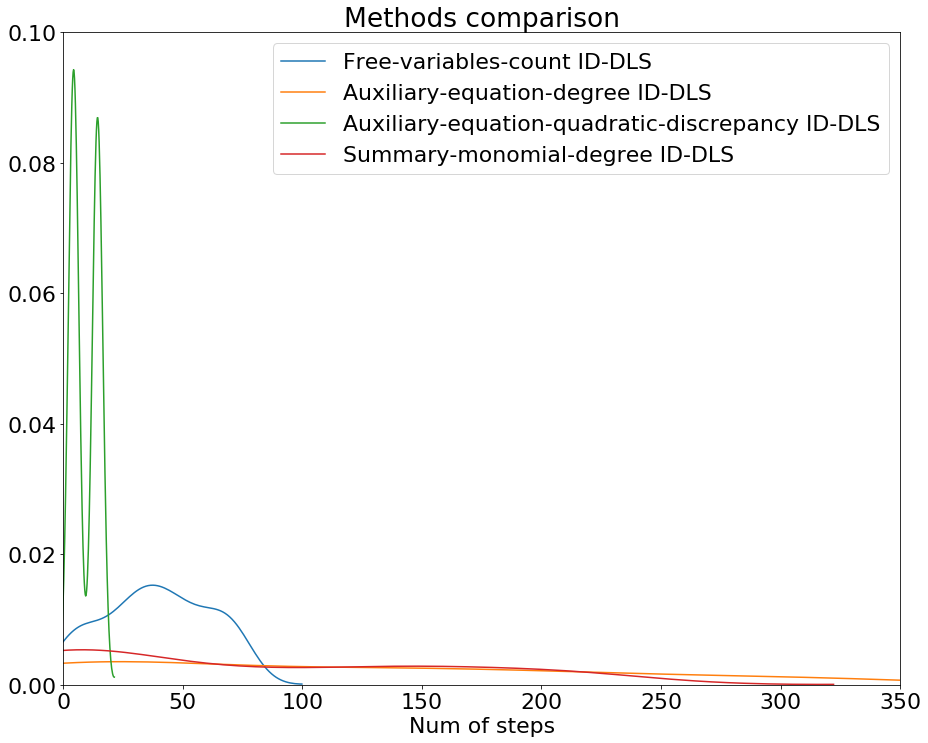

In [40]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))
sns.distplot(filter_nan(iddfs_free_variables_count), label="Free-variables-count ID-DLS", kde=True, hist=False)
sns.distplot(filter_nan(iddfs_auxiliary_equation_degree), label="Auxiliary-equation-degree ID-DLS", kde=True, hist=False)
sns.distplot(filter_nan(iddfs_auxiliary_equation_quadratic_discrepancy), label="Auxiliary-equation-quadratic-discrepancy ID-DLS", kde=True, hist=False)
sns.distplot(filter_nan(iddfs_summary_monomial_degree), label="Summary-monomial-degree ID-DLS", kde=True, hist=False)
plt.legend()
plt.xlim(0, 350)
plt.ylim(0, 0.1)
plt.xlabel("Num of steps")
plt.title("Methods comparison")
plt.savefig('results/2.png')


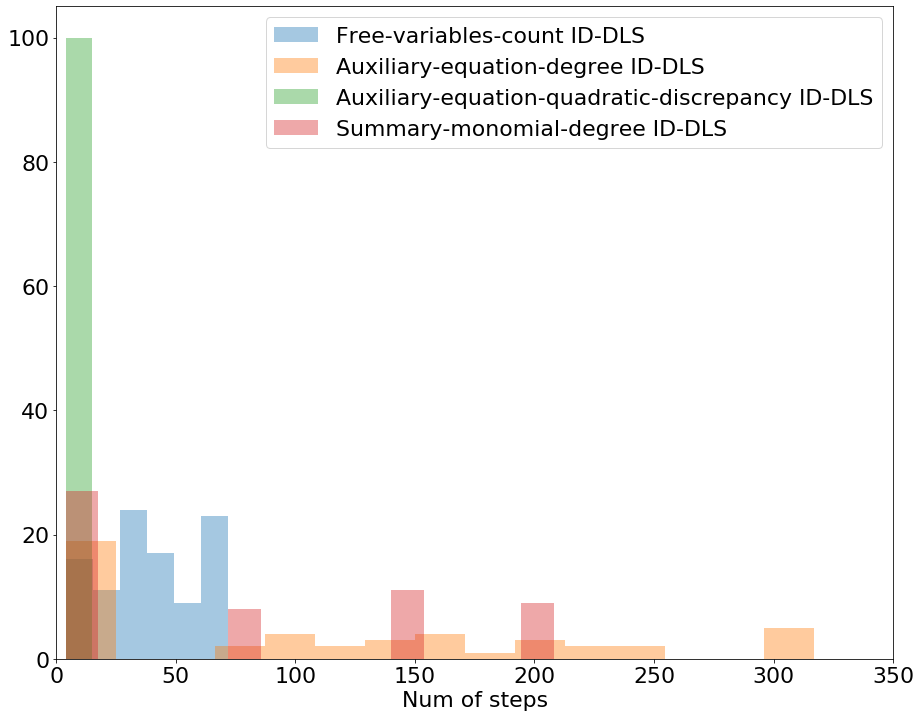

In [41]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))
sns.distplot(filter_nan(iddfs_free_variables_count), label="Free-variables-count ID-DLS", kde=False, hist=True)
sns.distplot(filter_nan(iddfs_auxiliary_equation_degree), label="Auxiliary-equation-degree ID-DLS", kde=False, hist=True, bins=15)
sns.distplot(filter_nan(iddfs_auxiliary_equation_quadratic_discrepancy), label="Auxiliary-equation-quadratic-discrepancy ID-DLS",
             kde=False, hist=True, bins=1)
sns.distplot(filter_nan(iddfs_summary_monomial_degree), label="Summary-monomial-degree ID-DLS", kde=False, hist=True, bins=15)
plt.legend()
plt.xlim(0, 350)
plt.xlabel("Num of steps")
plt.savefig('results/3.png')



In [44]:
import pandas as pd

def flatten(lst):
    return [item for sublist in lst for item in sublist]

steps_df = pd.DataFrame({
    'steps': filter_nan(bfs_steps) +
             filter_nan(iddfs_random) +
             filter_nan(iddfs_frequent_first) +
             filter_nan(iddfs_free_variables_count) +
             filter_nan(iddfs_auxiliary_equation_degree) +
             filter_nan(iddfs_auxiliary_equation_quadratic_discrepancy) +
             filter_nan(iddfs_summary_monomial_degree),
    'method': ["BFS"] * len(filter_nan(bfs_steps)) +
              ["Random"] * len(filter_nan(iddfs_random)) +
              ["FF"] * len(filter_nan(iddfs_frequent_first)) +
              ["FVC"] * len(filter_nan(iddfs_free_variables_count)) +
              ["AED"] * len(filter_nan(iddfs_auxiliary_equation_degree)) +
              ["AEQD"] * len(filter_nan(iddfs_auxiliary_equation_quadratic_discrepancy)) +
              ["SMD"] * len(filter_nan(iddfs_summary_monomial_degree))

})

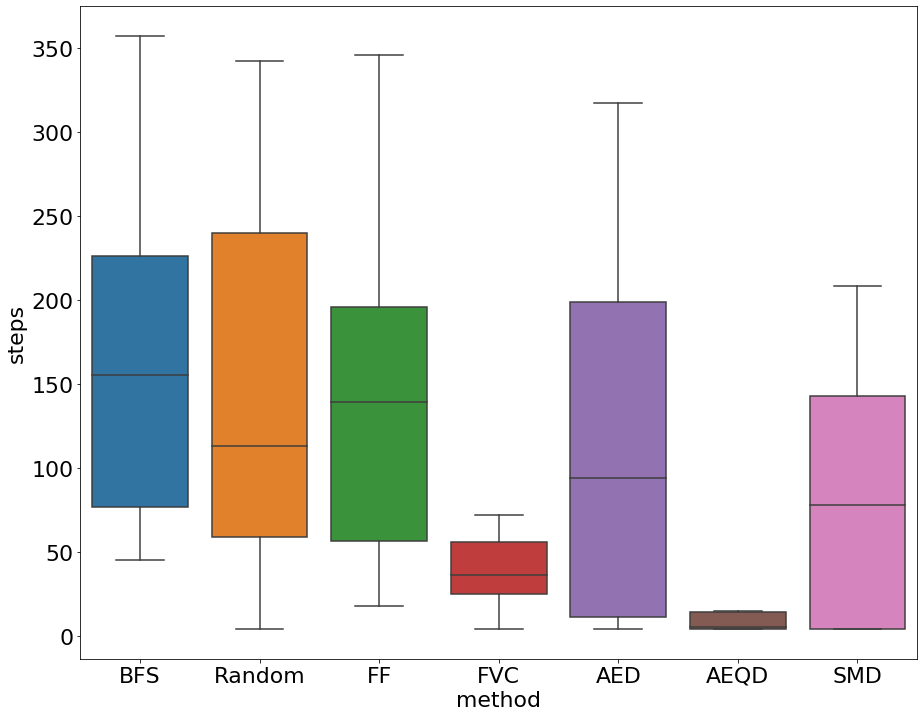

In [45]:
plt.figure(figsize=(15, 12))
sns.boxplot('method', 'steps', data=steps_df)
plt.savefig('results/4.png')


In [38]:
np.save('results/bfs_steps', bfs_steps)
np.save('results/iddfs_random_steps', iddfs_random)
np.save('results/iddfs_frequent_first', iddfs_frequent_first)
np.save('results/iddfs_free_variables_count', iddfs_free_variables_count)
np.save('results/iddfs_auxiliary_equation_degree', iddfs_auxiliary_equation_degree)
np.save('results/iddfs_auxiliary_equation_quadratic_discrepancy', iddfs_auxiliary_equation_quadratic_discrepancy)
np.save('results/iddfs_summary_monomial_degree', iddfs_summary_monomial_degree)